## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

## Exploratory data analysis

In [4]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#observe the different feature type present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Here we will observe the distribution of our classes

In [6]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print(normal_share)
print(fraud_share)

99.82725143693798
0.1727485630620034


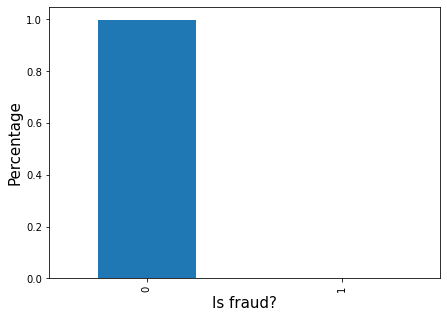

In [7]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(7,5))
df.Class.value_counts(normalize=True).plot.bar()
plt.xlabel("Is fraud?", fontsize=15)
plt.ylabel("Percentage", fontsize=15)
plt.show()

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

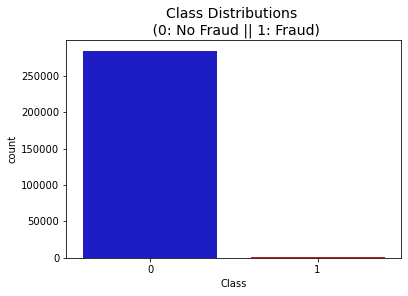

In [8]:
sns.countplot('Class', data=df, palette=["#0101DF", "#DF0101"])
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

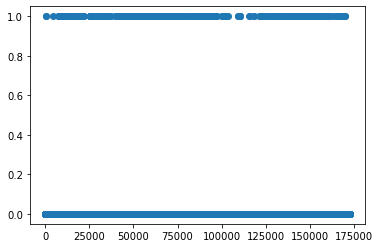

In [9]:
# Create a scatter plot to observe the distribution of classes with time
time_val = df['Time'].values
class_val = df['Class'].values
plt.scatter(x=time_val, y=class_val)
plt.show()

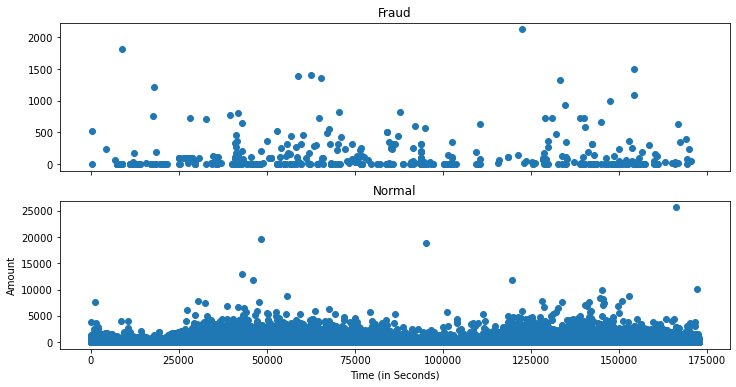

In [10]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,6))

ax1.scatter(df.Time[df.Class == 1], df.Amount[df.Class == 1])
ax1.set_title('Fraud')

ax2.scatter(df.Time[df.Class == 0], df.Amount[df.Class == 0])
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

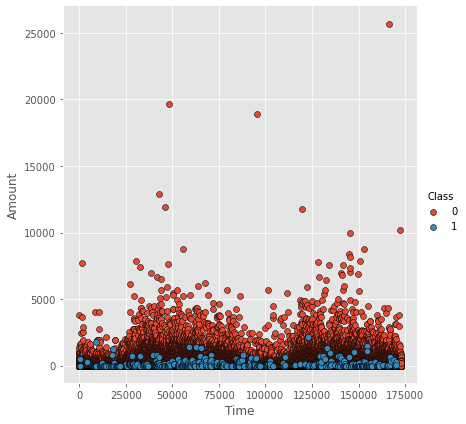

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
sns.FacetGrid(df, hue="Class", height = 6).map(plt.scatter, "Time", "Amount", edgecolor="k").add_legend()
plt.show()

### The above plot shows that there are frauds only on the transactions which have transaction amount less than 2500 (approx). However, the frauds in the transactions are evenly distributed throughout all times.

### Splitting the data into train & test data

In [12]:
y= df['Class'] #class variable
X = df.drop(['Class'],axis=1)

In [13]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=100)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [14]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
350
142


### Plotting the distribution of a variable

<AxesSubplot:xlabel='V1', ylabel='Density'>

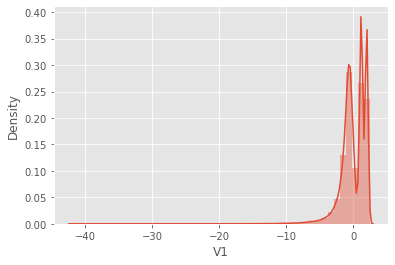

In [15]:
# plot the histogram of a variable from the dataset to see the skewness
sns.distplot(X_train['V1'])

<AxesSubplot:xlabel='Amount', ylabel='Density'>

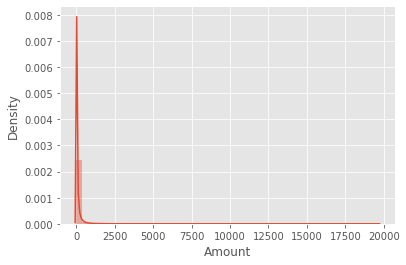

In [16]:
sns.distplot(X_train['Amount'])

<AxesSubplot:xlabel='V2', ylabel='Density'>

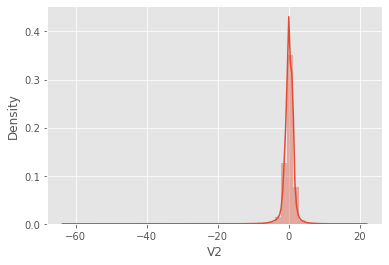

In [17]:
sns.distplot(X_train['V2'])

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [18]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False) 
X_train = pt.fit_transform(X_train)
X_test = pt.transform(X_test)

In [19]:
X_train = pd.DataFrame(X_train, columns = df.columns[:-1])

In [20]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.977762,0.598470,-0.076635,0.414364,0.017924,-0.150960,0.345395,-0.423005,0.053042,1.152344,...,-0.142787,-0.217742,-0.215110,0.229615,-0.518220,-0.140181,1.711153,-0.180481,-0.027825,-1.853467
1,0.730062,1.445565,-0.134373,-0.902690,0.208193,0.136115,-0.409005,0.073299,-0.252318,0.277355,...,-0.220963,-0.355324,-0.881595,0.418801,-0.841362,-0.510193,0.511993,-0.206056,-0.220886,-1.446662
2,-0.254749,0.843049,-0.987411,-0.652970,-1.919788,0.423178,2.278265,-1.478071,0.853644,-1.629738,...,-0.090662,-0.009865,0.104342,-0.203779,1.917859,0.990486,0.014536,0.099397,0.107899,0.706491
3,1.193842,-0.326321,0.805913,-0.366669,-0.296532,0.512231,-0.805682,0.794658,-0.185940,0.130993,...,0.173877,-0.457294,-1.012077,0.252022,1.861162,-0.857357,0.288656,0.854371,0.473371,-1.576187
4,-0.980315,0.566536,-0.144094,0.637616,0.445581,-0.564414,0.053504,-0.482081,0.184401,0.269297,...,-0.222159,0.013937,-0.092414,0.225649,0.287704,-0.037162,0.529867,-0.020486,0.051746,-0.715547


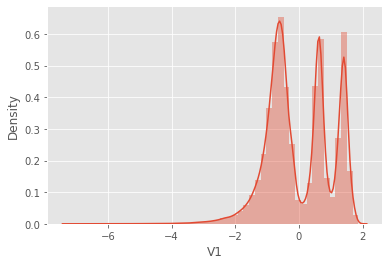

In [21]:
# plot the histogram of a variable from the dataset again to see the result 
sns.distplot(X_train['V1'])
plt.show()

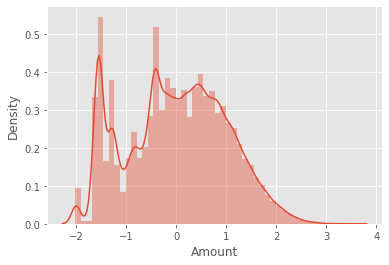

In [22]:
sns.distplot(X_train['Amount'])
plt.show()

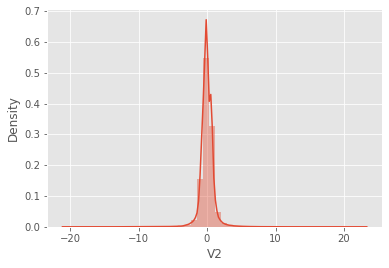

In [23]:
sns.distplot(X_train['V2'])
plt.show()

## Model Building
- Build different models on the imbalanced dataset and see the result

## Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression #import the package
logreg = LogisticRegression()
model_logreg = logreg.fit(X_train, y_train)
y_train_pred = model_logreg.predict(X_train)
print("Accuracy : ", round(100*metrics.accuracy_score(y_train, y_train_pred),2))
print("Recall : ", round(100*metrics.recall_score(y_train, y_train_pred),2))
print("Precision : ", round(100*metrics.precision_score(y_train, y_train_pred),2))

Accuracy :  99.93
Recall :  70.0
Precision :  90.41


#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [25]:
#perform cross validation
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
target = df.loc[:,'Class']
for train_ix, test_ix in skf.split(df, target):
    # select rows
    X_train_cv, X_test_cv = X.iloc[train_ix], X.iloc[test_ix]
    y_train_cv, y_test_cv = target.iloc[train_ix], target.iloc[test_ix]
    # summarize train and test composition
    train_0, train_1 = len(y_train_cv[y_train_cv==0]), len(y_train_cv[y_train_cv==1])
    test_0, test_1 = len(y_test_cv[y_test_cv==0]), len(y_test_cv[y_test_cv==1])
    print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

>Train: 0=227452, 1=393, Test: 0=56863, 1=99
>Train: 0=227452, 1=393, Test: 0=56863, 1=99
>Train: 0=227452, 1=394, Test: 0=56863, 1=98
>Train: 0=227452, 1=394, Test: 0=56863, 1=98
>Train: 0=227452, 1=394, Test: 0=56863, 1=98


In [26]:
#Logistic Regression after CV
logreg = LogisticRegression()
model_logreg = logreg.fit(X_train_cv, y_train_cv)
#Predicting on train set
y_train_pred = model_logreg.predict(X_train_cv)
print("Accuracy : ", round(100*metrics.accuracy_score(y_train_cv, y_train_pred),2))
print("Recall : ", round(100*metrics.recall_score(y_train_cv, y_train_pred),2))
print("Precision : ", round(100*metrics.precision_score(y_train_cv, y_train_pred),2))

Accuracy :  99.9
Recall :  66.5
Precision :  72.98


In [27]:
#Predicting on test set
y_test_pred = logreg.predict(X_test_cv)
print("Accuracy : ", round(100*metrics.accuracy_score(y_test_cv, y_test_pred),2))
print("Recall : ", round(100*metrics.recall_score(y_test_cv, y_test_pred),2))
print("Precision : ", round(100*metrics.precision_score(y_test_cv, y_test_pred),2))

Accuracy :  99.91
Recall :  67.35
Precision :  75.86


In [29]:
#perform hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# Parameter grid
params = [{'penalty' : ['none', 'l1', 'l2', 'elasticnet'],
              'C' : [10, 1.0, 0.1,],
              'solver' : ['lbfgs','newton-cg','liblinear']}]

#specify model
logreg = LogisticRegression()

# Create random search object
logreg_cv = RandomizedSearchCV(estimator=logreg, n_iter=50,
                         param_distributions = params, 
                        scoring = 'recall',
                         cv = skf,
                         verbose=1,
                         n_jobs=-1)


In [31]:
%%time
# Fit on data
logreg_cv.fit(X_train_cv, y_train_cv)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  5.6min finished


Wall time: 5min 38s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=LogisticRegression(), n_iter=50, n_jobs=-1,
                   param_distributions=[{'C': [10, 1.0, 0.1],
                                         'penalty': ['none', 'l1', 'l2',
                                                     'elasticnet'],
                                         'solver': ['lbfgs', 'newton-cg',
                                                    'liblinear']}],
                   scoring='recall', verbose=1)

In [27]:
print(logreg_cv.best_params_)
print(logreg_cv.best_score_)
print(logreg_cv.best_estimator_)

{'solver': 'lbfgs', 'penalty': 'none', 'C': 10}
0.6753975981824083
LogisticRegression(C=10, penalty='none')


In [28]:
#Fitting Logistic Regression with best parameters on train set
logreg = LogisticRegression(C=10, penalty= 'none',solver= 'lbfgs')
logregcv = logreg.fit(X_train_cv, y_train_cv)
y_train_pred = logregcv.predict(X_train_cv)
print("Accuracy : ", round(100*metrics.accuracy_score(y_train_cv, y_train_pred),2))
print("Recall : ", round(100*metrics.recall_score(y_train_cv, y_train_pred),2))
print("Precision : ", round(100*metrics.precision_score(y_train_cv, y_train_pred),2))

Accuracy :  99.9
Recall :  67.01
Precision :  70.97


In [29]:
#Fitting on test set
y_test_pred = logregcv.predict(X_test_cv)
print("Accuracy : ", round(100*metrics.accuracy_score(y_test_cv, y_test_pred),2))
print("Recall : ", round(100*metrics.recall_score(y_test_cv, y_test_pred),2))
print("Precision : ", round(100*metrics.precision_score(y_test_cv, y_test_pred),2))

Accuracy :  99.89
Recall :  65.31
Precision :  68.82


### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

## Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42,n_jobs=-1)
rfc.fit(X_train_cv,y_train_cv)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [31]:
#Predicting on train set
y_train_pred = rfc.predict(X_train_cv)
print("Accuracy : ", round(100*metrics.accuracy_score(y_train_cv, y_train_pred),2))
print("Recall : ", round(100*metrics.recall_score(y_train_cv, y_train_pred),2))
print("Precision : ", round(100*metrics.precision_score(y_train_cv, y_train_pred),2))

Accuracy :  100.0
Recall :  99.75
Precision :  100.0


In [32]:
#Predicting on test set
y_test_pred = rfc.predict(X_test_cv)
print("Accuracy : ", round(100*metrics.accuracy_score(y_test_cv, y_test_pred),2))
print("Recall : ", round(100*metrics.recall_score(y_test_cv, y_test_pred),2))
print("Precision : ", round(100*metrics.precision_score(y_test_cv, y_test_pred),2))

Accuracy :  99.96
Recall :  78.57
Precision :  95.06


In [33]:
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
# Parameter grid
params = {'max_depth': [10,30,50],
         'min_samples_leaf': [1,5,10],
          'min_samples_split': [2, 5, 10],
          'max_features': ['auto','sqrt'],
          'n_estimators': [50,100]
         }

# Specify model
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)

# Create random search object
random = RandomizedSearchCV(estimator=rfc,
                         param_distributions = params,
                         scoring = 'recall',
                         cv = skf,
                         verbose=1,n_jobs=-1)

# Fit on data
random.fit(X_train_cv, y_train_cv)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 30, 50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 5, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100]},
                   scoring='recall', verbose=1)

In [34]:
print(random.best_params_)
print(random.best_score_)
print(random.best_estimator_)

{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 50}
0.7893865628042843
RandomForestClassifier(max_depth=50, n_jobs=-1, random_state=42)


In [35]:
#Fitting Random Forest with best parameters on train set
rfc = RandomForestClassifier(min_samples_split=2, min_samples_leaf=1, max_depth=20, max_features='sqrt',
                             n_jobs=-1, random_state=42)
rfccv = rfc.fit(X_train_cv, y_train_cv)
#Predicting on train set
y_train_pred = rfccv.predict(X_train_cv)
print("Accuracy : ", round(100*metrics.accuracy_score(y_train_cv, y_train_pred),2))
print("Recall : ", round(100*metrics.recall_score(y_train_cv, y_train_pred),2))
print("Precision : ", round(100*metrics.precision_score(y_train_cv, y_train_pred),2))

Accuracy :  100.0
Recall :  97.21
Precision :  100.0


In [36]:
#Predicting on test set
y_test_pred = rfccv.predict(X_test_cv)
print("Accuracy : ", round(100*metrics.accuracy_score(y_test_cv, y_test_pred),2))
print("Recall : ", round(100*metrics.recall_score(y_test_cv, y_test_pred),2))
print("Precision : ", round(100*metrics.precision_score(y_test_cv, y_test_pred),2))

Accuracy :  99.96
Recall :  79.59
Precision :  95.12


## XGBOOST

In [37]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [38]:
# fit model on training data with default hyperparameters
xgb = XGBClassifier(random_state=42, n_jobs=-1)
xgb.fit(X_train_cv, y_train_cv)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [39]:
#Predicting on train set
y_train_pred = xgb.predict(X_train_cv)
print("Accuracy : ", round(100*metrics.accuracy_score(y_train_cv, y_train_pred),2))
print("Recall : ", round(100*metrics.recall_score(y_train_cv, y_train_pred),2))
print("Precision : ", round(100*metrics.precision_score(y_train_cv, y_train_pred),2))

Accuracy :  100.0
Recall :  100.0
Precision :  100.0


In [40]:
#Predicting on test set
y_test_pred = xgb.predict(X_test_cv)
print("Accuracy : ", round(100*metrics.accuracy_score(y_test_cv, y_test_pred),2))
print("Recall : ", round(100*metrics.recall_score(y_test_cv, y_test_pred),2))
print("Precision : ", round(100*metrics.precision_score(y_test_cv, y_test_pred),2))

Accuracy :  99.95
Recall :  75.51
Precision :  93.67


In [41]:
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
# Parameter grid
params = {
    'learning_rate': [0.1,0.3,0.5],
    'max_depth': [2,6,10],
    'min_child_weight': [1,3,5],
    'subsample': [0.5,0.7,0.9],
    'gamma' : [0,0.1,0.3],
         }
         
#specify model
xgb = XGBClassifier(random_state=42, n_jobs=-1)
#xgb.fit(X_train_pca, y_train)

# Create random search object
random = RandomizedSearchCV(estimator=xgb,
                         param_distributions = params,
                         scoring = 'recall',
                         cv = skf, n_iter=20,
                         verbose=1,n_jobs=-1)

# Fit on data
random.fit(X_train_cv, y_train_cv)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, m...
                                           num_parallel_tree=None,
                                           random_state=42, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=None

In [42]:
print(random.best_params_)
print(random.best_score_)
print(random.best_estimator_)

{'subsample': 0.9, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.3}
0.8122362869198312
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [43]:
# fit model on training data with tuned hyperparameters
xgbcv = XGBClassifier(subsample= 0.7, n_estimators= 100, min_child_weight= 1, max_depth= 10, learning_rate= 0.1,
                    gamma= 0, random_state=42, n_jobs=-1)

xgbcv.fit(X_train_cv, y_train_cv)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
#Predicting on train set
y_train_pred = xgbcv.predict(X_train_cv)
print("Accuracy : ", round(100*metrics.accuracy_score(y_train_cv, y_train_pred),2))
print("Recall : ", round(100*metrics.recall_score(y_train_cv, y_train_pred),2))
print("Precision : ", round(100*metrics.precision_score(y_train_cv, y_train_pred),2))

Accuracy :  99.98
Recall :  91.12
Precision :  100.0


In [45]:
#Predicting on test set
y_test_pred = xgbcv.predict(X_test_cv)
print("Accuracy : ", round(100*metrics.accuracy_score(y_test_cv, y_test_pred),2))
print("Recall : ", round(100*metrics.recall_score(y_test_cv, y_test_pred),2))
print("Precision : ", round(100*metrics.precision_score(y_test_cv, y_test_pred),2))

Accuracy :  99.95
Recall :  79.59
Precision :  92.86


## KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier
# fit model on training data with default hyperparameters
knn = KNeighborsClassifier(n_jobs=-1)
knn.fit(X_train_cv,y_train_cv)

KNeighborsClassifier(n_jobs=-1)

In [47]:
#Predicting on train set
y_train_pred = knn.predict(X_train_cv)
print("Accuracy : ", round(100*metrics.accuracy_score(y_train_cv, y_train_pred),2))
print("Recall : ", round(100*metrics.recall_score(y_train_cv, y_train_pred),2))
print("Precision : ", round(100*metrics.precision_score(y_train_cv, y_train_pred),2))

Accuracy :  99.84
Recall :  10.41
Precision :  97.62


In [48]:
#Predicting on test set
y_test_pred = knn.predict(X_test_cv)
print("Accuracy : ", round(100*metrics.accuracy_score(y_test_cv, y_test_pred),2))
print("Recall : ", round(100*metrics.recall_score(y_test_cv, y_test_pred),2))
print("Precision : ", round(100*metrics.precision_score(y_test_cv, y_test_pred),2))

Accuracy :  99.83
Recall :  4.08
Precision :  100.0


## Decicion tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train_cv, y_train_cv)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [50]:
#Predicting on train set
y_train_pred = dt.predict(X_train_cv)
print("Accuracy : ", round(100*metrics.accuracy_score(y_train_cv, y_train_pred),2))
print("Recall : ", round(100*metrics.recall_score(y_train_cv, y_train_pred),2))
print("Precision : ", round(100*metrics.precision_score(y_train_cv, y_train_pred),2))

Accuracy :  99.94
Recall :  72.59
Precision :  88.27


In [51]:
#Predicting on test set
y_test_pred = dt.predict(X_test_cv)
print("Accuracy : ", round(100*metrics.accuracy_score(y_test_cv, y_test_pred),2))
print("Recall : ", round(100*metrics.recall_score(y_test_cv, y_test_pred),2))
print("Precision : ", round(100*metrics.precision_score(y_test_cv, y_test_pred),2))

Accuracy :  99.92
Recall :  65.31
Precision :  86.49


In [52]:
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
# Parameter grid
params = {'max_depth':['none',3,5],
          'max_features': ['auto','sqrt'],
          'criterion':['gini','entropy'],
          'min_samples_leaf':[1,5,9],
          'min_samples_split':[1,2,4]
         }
         
#specify model
dt =DecisionTreeClassifier(random_state=42)
#xgb.fit(X_train_pca, y_train)

# Create random search object
random = RandomizedSearchCV(estimator=dt,
                         param_distributions = params,
                         scoring = 'recall',
                         cv = skf, n_iter=20,
                         verbose=1, random_state=42)

# Fit on data
random.fit(X_train_cv, y_train_cv)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=DecisionTreeClassifier(random_state=42), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': ['none', 3, 5],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 5, 9],
                                        'min_samples_split': [1, 2, 4]},
                   random_state=42, scoring='recall', verbose=1)

In [53]:
print(random.best_params_)
print(random.best_score_)
print(random.best_estimator_)

{'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 5, 'criterion': 'entropy'}
0.6828302499188574
DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='auto',
                       min_samples_leaf=5, min_samples_split=4,
                       random_state=42)


In [54]:
# fit model on training data with tuned hyperparameters
dtcv = DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='auto',
                       min_samples_leaf=5, min_samples_split=4,
                       random_state=42)
dtcv.fit(X_train_cv, y_train_cv)

DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='auto',
                       min_samples_leaf=5, min_samples_split=4,
                       random_state=42)

In [55]:
#Predicting on train set
y_train_pred = dtcv.predict(X_train_cv)
print("Accuracy : ", round(100*metrics.accuracy_score(y_train_cv, y_train_pred),2))
print("Recall : ", round(100*metrics.recall_score(y_train_cv, y_train_pred),2))
print("Precision : ", round(100*metrics.precision_score(y_train_cv, y_train_pred),2))

Accuracy :  99.96
Recall :  82.74
Precision :  95.6


In [56]:
#Predicting on test set
y_test_pred = dtcv.predict(X_test_cv)
print("Accuracy : ", round(100*metrics.accuracy_score(y_test_cv, y_test_pred),2))
print("Recall : ", round(100*metrics.recall_score(y_test_cv, y_test_pred),2))
print("Precision : ", round(100*metrics.precision_score(y_test_cv, y_test_pred),2))

Accuracy :  99.94
Recall :  73.47
Precision :  87.8


## SVM

In [57]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train_cv, y_train_cv)

SVC(kernel='linear')

In [58]:
#Predicting on train set
y_train_pred = clf.predict(X_train_cv)
print("Accuracy : ", round(100*metrics.accuracy_score(y_train_cv, y_train_pred),2))
print("Recall : ", round(100*metrics.recall_score(y_train_cv, y_train_pred),2))
print("Precision : ", round(100*metrics.precision_score(y_train_cv, y_train_pred),2))

Accuracy :  99.86
Recall :  34.52
Precision :  69.04


In [59]:
#Predicting on test set
y_test_pred = clf.predict(X_test_cv)
print("Accuracy : ", round(100*metrics.accuracy_score(y_test_cv, y_test_pred),2))
print("Recall : ", round(100*metrics.recall_score(y_test_cv, y_test_pred),2))
print("Precision : ", round(100*metrics.precision_score(y_test_cv, y_test_pred),2))

Accuracy :  99.87
Recall :  33.67
Precision :  75.0


#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [60]:
#initialise the model with optimum hyperparameters
clf = RandomForestClassifier(min_samples_split=2, min_samples_leaf=1, max_depth=20, max_features='sqrt',
                             n_jobs=-1, random_state=42)
clf.fit(X_train, y_train)
#print the evaluation score on the X_test by choosing the best evaluation metric
y_test_pred = clf.predict(X_test)
print("Accuracy : ", round(100*metrics.accuracy_score(y_test, y_test_pred),2))
print("Recall : ", round(100*metrics.recall_score(y_test, y_test_pred),2))
print("Precision : ", round(100*metrics.precision_score(y_test, y_test_pred),2))

Accuracy :  99.94
Recall :  75.35
Precision :  89.92


### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 18
2nd Top var = 13
3rd Top var = 15


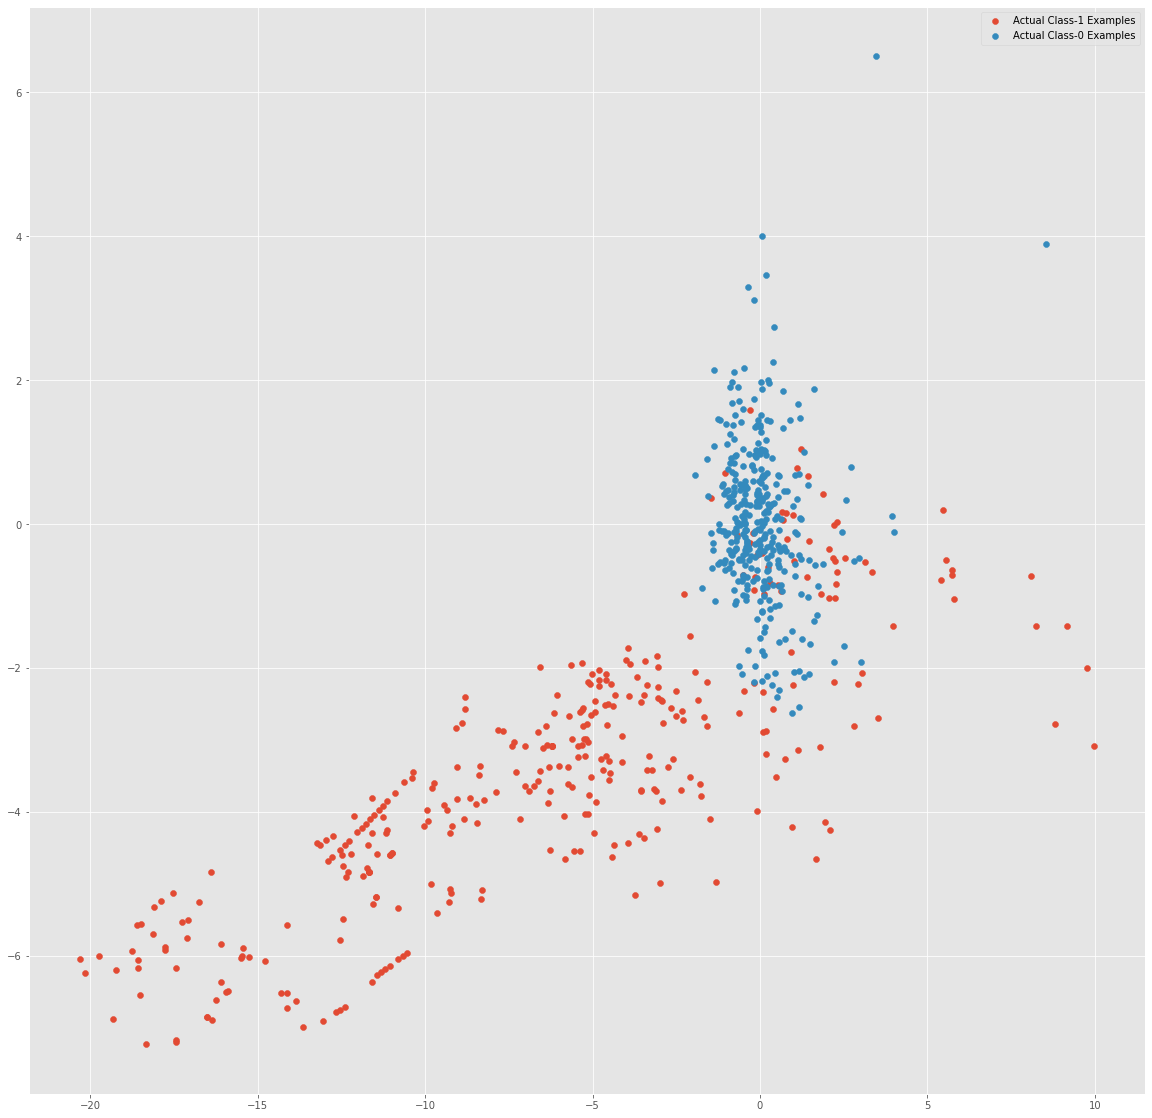

In [61]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

In [62]:
# Logistic Regression
from sklearn import linear_model #import the package

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Oversampling

In [63]:
# import the packages & check version number
import imblearn
print(imblearn.__version__)
from imblearn import over_sampling

0.7.0


In [64]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
target = df.loc[:,'Class']
for train_ix, test_ix in skf.split(df, target):
    # select rows
    X_train_cv, X_test_cv = X.iloc[train_ix], X.iloc[test_ix]
    y_train_cv, y_test_cv = target.iloc[train_ix], target.iloc[test_ix]
    # summarize train and test composition
    train_0, train_1 = len(y_train_cv[y_train_cv==0]), len(y_train_cv[y_train_cv==1])
    test_0, test_1 = len(y_test_cv[y_test_cv==0]), len(y_test_cv[y_test_cv==1])
    print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))
    
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_cv_resampled, y_train_cv_resampled = ros.fit_resample(X_train_cv,y_train_cv)

>Train: 0=227452, 1=393, Test: 0=56863, 1=99
>Train: 0=227452, 1=393, Test: 0=56863, 1=99
>Train: 0=227452, 1=394, Test: 0=56863, 1=98
>Train: 0=227452, 1=394, Test: 0=56863, 1=98
>Train: 0=227452, 1=394, Test: 0=56863, 1=98


In [65]:
y_train_cv_resampled.value_counts()

1    227452
0    227452
Name: Class, dtype: int64

In [66]:
#perform hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# Parameter grid
params = [{'penalty' : ['l1', 'l2'],
              'C' : [10, 1.0, 0.1,],
              'solver' : ['liblinear', 'saga']}]

#specify model
logreg = LogisticRegression()

# Create random search object
logreg_cv = RandomizedSearchCV(estimator=logreg, n_iter=20,
                         param_distributions = params, 
                        scoring = 'recall',
                         cv = skf,
                         verbose=1,
                         n_jobs=-1)

# Fit on data
logreg_cv.fit(X_train_cv_resampled, y_train_cv_resampled)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=LogisticRegression(), n_iter=20, n_jobs=-1,
                   param_distributions=[{'C': [10, 1.0, 0.1],
                                         'penalty': ['l1', 'l2'],
                                         'solver': ['liblinear', 'saga']}],
                   scoring='recall', verbose=1)

In [67]:
print(logreg_cv.best_params_)
print(logreg_cv.best_score_)
print(logreg_cv.best_estimator_)

{'solver': 'liblinear', 'penalty': 'l1', 'C': 1.0}
0.9289784233976424
LogisticRegression(penalty='l1', solver='liblinear')


In [68]:
# fit model on training data with tuned hyperparameters
tunedlogreg = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
tunedlogreg.fit(X_train_cv_resampled, y_train_cv_resampled)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [69]:
#print the evaluation result by choosing a evaluation metric

#Predicting on train set
y_train_pred = tunedlogreg.predict(X_train_cv_resampled)
print("Accuracy : ", round(100*metrics.accuracy_score(y_train_cv_resampled, y_train_pred),2))
print("Recall : ", round(100*metrics.recall_score(y_train_cv_resampled, y_train_pred),2))
print("Precision : ", round(100*metrics.precision_score(y_train_cv_resampled, y_train_pred),2))

Accuracy :  95.27
Recall :  92.85
Precision :  97.57


In [70]:
#Predicting on test set
y_test_pred = tunedlogreg.predict(X_test_cv)
print("Accuracy : ", round(100*metrics.accuracy_score(y_test_cv, y_test_pred),2))
print("Recall : ", round(100*metrics.recall_score(y_test_cv, y_test_pred),2))
print("Precision : ", round(100*metrics.precision_score(y_test_cv, y_test_pred),2))

Accuracy :  97.81
Recall :  88.78
Precision :  6.56


In [71]:
#print the optimum value of hyperparameters
print(logreg_cv.best_params_)

{'solver': 'liblinear', 'penalty': 'l1', 'C': 1.0}


### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

## Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
# Parameter grid
params = {'max_depth': [5,10,20],
         'min_samples_leaf': [1,5,10],
          'min_samples_split': [2, 5, 10],
          'max_features': ['auto','sqrt'],
         }

# Specify model
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)

# Create random search object
random = RandomizedSearchCV(estimator=rfc,
                         param_distributions = params,
                         scoring = 'recall',
                         cv = skf,
                         verbose=1,
                        n_jobs=-1, random_state=42)

# Fit on data
random.fit(X_train_cv_resampled, y_train_cv_resampled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 5, 10],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, scoring='recall', verbose=1)

In [73]:
print(random.best_params_)
print(random.best_score_)
print(random.best_estimator_)

{'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 20}
1.0
RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=5, n_jobs=-1, random_state=42)


In [74]:
# fit model on training data with tuned hyperparameters
tunedrfc = RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=5, n_jobs=-1, random_state=42)
tunedrfc.fit(X_train_cv_resampled, y_train_cv_resampled)

RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=5, n_jobs=-1, random_state=42)

In [75]:
#Predicting on train set
y_train_pred = tunedrfc.predict(X_train_cv_resampled)
print("Accuracy : ", round(100*metrics.accuracy_score(y_train_cv_resampled, y_train_pred),2))
print("Recall : ", round(100*metrics.recall_score(y_train_cv_resampled, y_train_pred),2))
print("Precision : ", round(100*metrics.precision_score(y_train_cv_resampled, y_train_pred),2))

Accuracy :  99.99
Recall :  100.0
Precision :  99.99


In [76]:
#Predicting on test set
y_test_pred = tunedrfc.predict(X_test_cv)
print("Accuracy : ", round(100*metrics.accuracy_score(y_test_cv, y_test_pred),2))
print("Recall : ", round(100*metrics.recall_score(y_test_cv, y_test_pred),2))
print("Precision : ", round(100*metrics.precision_score(y_test_cv, y_test_pred),2))

Accuracy :  99.94
Recall :  80.61
Precision :  85.87


## XGBOOST


In [77]:
from xgboost import XGBClassifier
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
# Parameter grid
params = {
    'learning_rate': [0.05,0.1,0.15],
    'max_depth': [5,10,15],
    'min_child_weight': [1,3,5],
    'subsample': [0.5,0.7,0.9],
    'gamma' : [0,0.1,0.3],
    'colsample_bytree':[0.8,1,1.1]
         }
         
#specify model
xgb = XGBClassifier(random_state=42, n_jobs=-1)
#xgb.fit(X_train_pca, y_train)

# Create random search object
random = RandomizedSearchCV(estimator=xgb,
                         param_distributions = params,
                         scoring = 'recall',
                         cv = skf, n_iter=20,
                         verbose=1,n_jobs=-1,
                           random_state=42)

# Fit on data
random.fit(X_train_cv_resampled, y_train_cv_resampled)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, m...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                           validate_parameters=N

In [78]:
print(random.best_params_)
print(random.best_score_)
print(random.best_estimator_)

{'subsample': 0.5, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.15, 'gamma': 0.3, 'colsample_bytree': 1}
1.0
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [79]:
# fit model on training data with tuned hyperparameters
tunedxgb = XGBClassifier(subsample= 0.5, min_child_weight= 8, max_depth= 2, learning_rate= 0.1,
                    gamma= 1, random_state=42, n_jobs=-1, colsample_bytree= 0.5, reg_alpha=500)
tunedxgb.fit(X_train_cv_resampled, y_train_cv_resampled)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=8, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=500, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [80]:
#Predicting on train set
y_train_pred = tunedxgb.predict(X_train_cv_resampled)
print("Accuracy : ", round(100*metrics.accuracy_score(y_train_cv_resampled, y_train_pred),2))
print("Recall : ", round(100*metrics.recall_score(y_train_cv_resampled, y_train_pred),2))
print("Precision : ", round(100*metrics.precision_score(y_train_cv_resampled, y_train_pred),2))

Accuracy :  96.14
Recall :  93.92
Precision :  98.3


In [81]:
#Predicting on test set
y_test_pred = tunedxgb.predict(X_test_cv)
print("Accuracy : ", round(100*metrics.accuracy_score(y_test_cv, y_test_pred),2))
print("Recall : ", round(100*metrics.recall_score(y_test_cv, y_test_pred),2))
print("Precision : ", round(100*metrics.precision_score(y_test_cv, y_test_pred),2))

Accuracy :  98.38
Recall :  86.73
Precision :  8.53


### Print the class distribution after applying SMOTE 

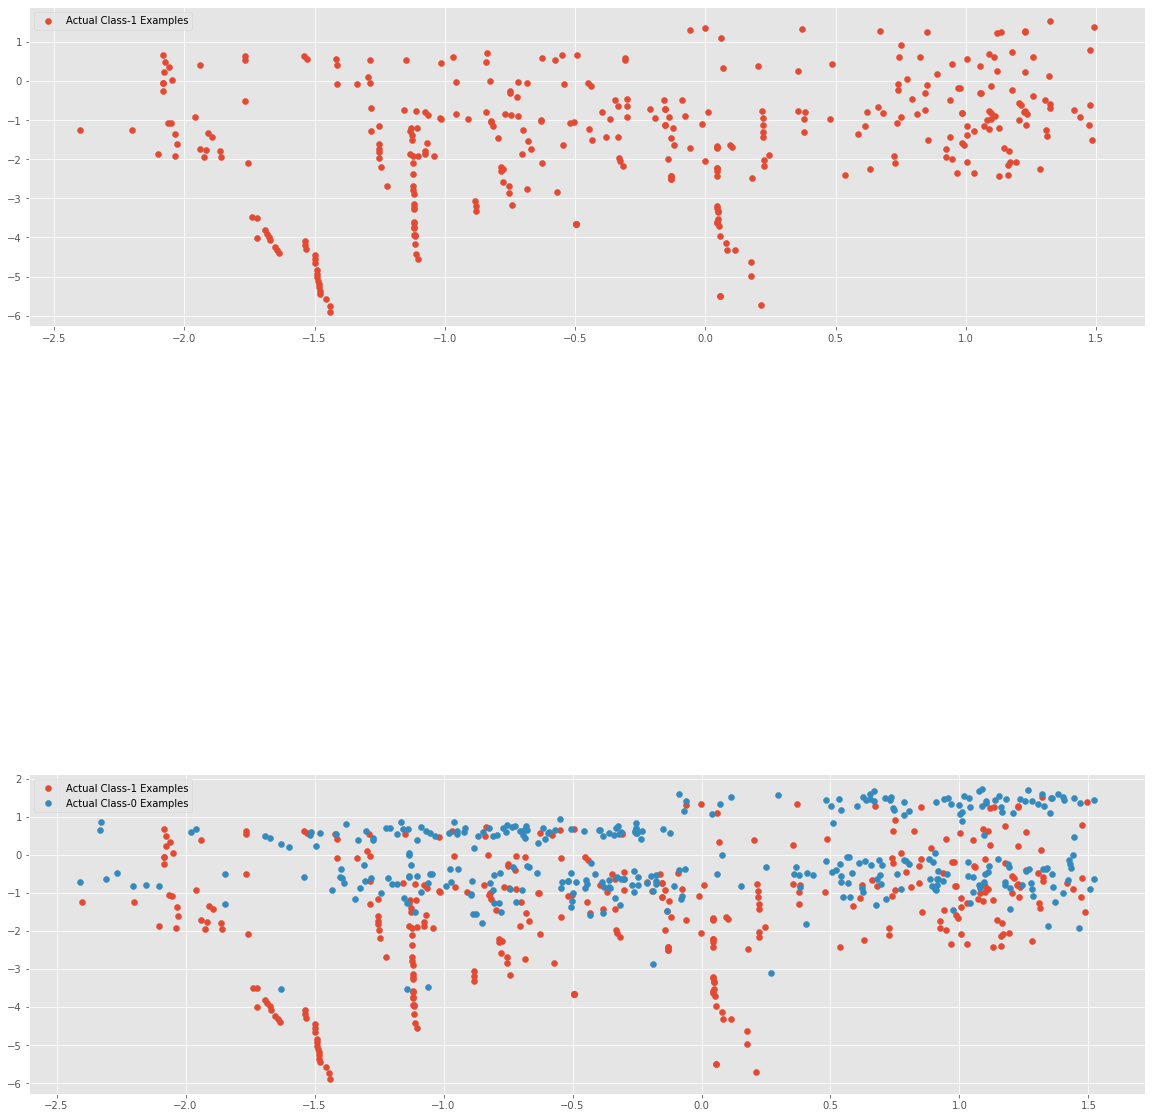

In [82]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]
X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

# plt.subplot(3, 1, 2)
# plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
# plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],label='Artificial SMOTE Class-1 Examples')
# plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [83]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
target = df.loc[:,'Class']
for train_ix, test_ix in skf.split(df, target):
    # select rows
    X_train_cv, X_test_cv = X.iloc[train_ix], X.iloc[test_ix]
    y_train_cv, y_test_cv = target.iloc[train_ix], target.iloc[test_ix]
    # summarize train and test composition
    train_0, train_1 = len(y_train_cv[y_train_cv==0]), len(y_train_cv[y_train_cv==1])
    test_0, test_1 = len(y_test_cv[y_test_cv==0]), len(y_test_cv[y_test_cv==1])
    print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))
    
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_train_cv_resampled, y_train_cv_resampled = sm.fit_resample(X_train_cv,y_train_cv)

>Train: 0=227452, 1=393, Test: 0=56863, 1=99
>Train: 0=227452, 1=393, Test: 0=56863, 1=99
>Train: 0=227452, 1=394, Test: 0=56863, 1=98
>Train: 0=227452, 1=394, Test: 0=56863, 1=98
>Train: 0=227452, 1=394, Test: 0=56863, 1=98


## Logistic Regression

In [84]:
#perform hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# Parameter grid
params = [{'penalty' : ['l1', 'l2'],
              'C' : [10, 1.0, 0.1,],
              'solver' : ['liblinear', 'saga']}]

#specify model
logreg = LogisticRegression()

# Create random search object
logreg_cv = RandomizedSearchCV(estimator=logreg, n_iter=20,
                         param_distributions = params, 
                        scoring = 'recall',
                         cv = skf,
                         verbose=1,
                         n_jobs=-1)

# Fit on data
logreg_cv.fit(X_train_cv_resampled, y_train_cv_resampled)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=LogisticRegression(), n_iter=20, n_jobs=-1,
                   param_distributions=[{'C': [10, 1.0, 0.1],
                                         'penalty': ['l1', 'l2'],
                                         'solver': ['liblinear', 'saga']}],
                   scoring='recall', verbose=1)

In [85]:
print(logreg_cv.best_params_)
print(logreg_cv.best_score_)
print(logreg_cv.best_estimator_)

{'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}
0.9679888507390254
LogisticRegression(C=0.1, penalty='l1', solver='liblinear')


In [86]:
# fit model on training data with tuned hyperparameters
tunedlogreg = LogisticRegression(C=10, penalty='l1', solver='liblinear')
tunedlogreg.fit(X_train_cv_resampled, y_train_cv_resampled)

LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [87]:
#print the evaluation result by choosing a evaluation metric

#Predicting on train set
y_train_pred = tunedlogreg.predict(X_train_cv_resampled)
print("Accuracy : ", round(100*metrics.accuracy_score(y_train_cv_resampled, y_train_pred),2))
print("Recall : ", round(100*metrics.recall_score(y_train_cv_resampled, y_train_pred),2))
print("Precision : ", round(100*metrics.precision_score(y_train_cv_resampled, y_train_pred),2))

Accuracy :  97.9
Recall :  96.77
Precision :  99.01


In [88]:
#Predicting on test set
y_test_pred = tunedlogreg.predict(X_test_cv)
print("Accuracy : ", round(100*metrics.accuracy_score(y_test_cv, y_test_pred),2))
print("Recall : ", round(100*metrics.recall_score(y_test_cv, y_test_pred),2))
print("Precision : ", round(100*metrics.precision_score(y_test_cv, y_test_pred),2))

Accuracy :  99.13
Recall :  85.71
Precision :  14.79


In [89]:
#print the optimum value of hyperparameters
print(logreg_cv.best_params_)

{'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}


## Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
# Parameter grid
params = {'max_depth': [5,10,20],
         'min_samples_leaf': [1,5,10],
          'min_samples_split': [2, 5, 10],
          'max_features': ['auto','sqrt'],
         }

# Specify model
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)

# Create random search object
random = RandomizedSearchCV(estimator=rfc,
                         param_distributions = params,
                         scoring = 'recall',
                         cv = skf,
                         verbose=1,
                        n_jobs=-1, random_state=42)

# Fit on data
random.fit(X_train_cv_resampled, y_train_cv_resampled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 5, 10],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, scoring='recall', verbose=1)

In [91]:
print(random.best_params_)
print(random.best_score_)
print(random.best_estimator_)

{'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 20}
0.9999912070519443
RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=5, n_jobs=-1, random_state=42)


In [92]:
from sklearn.ensemble import RandomForestClassifier
# fit model on training data with tuned hyperparameters
tunedrfc = RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=5, n_jobs=-1, random_state=42)
tunedrfc.fit(X_train_cv_resampled, y_train_cv_resampled)

RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=5, n_jobs=-1, random_state=42)

In [93]:
#Predicting on train set
y_train_pred = tunedrfc.predict(X_train_cv_resampled)
print("Accuracy : ", round(100*metrics.accuracy_score(y_train_cv_resampled, y_train_pred),2))
print("Recall : ", round(100*metrics.recall_score(y_train_cv_resampled, y_train_pred),2))
print("Precision : ", round(100*metrics.precision_score(y_train_cv_resampled, y_train_pred),2))

Accuracy :  99.99
Recall :  100.0
Precision :  99.98


In [94]:
#Predicting on test set
y_test_pred = tunedrfc.predict(X_test_cv)
print("Accuracy : ", round(100*metrics.accuracy_score(y_test_cv, y_test_pred),2))
print("Recall : ", round(100*metrics.recall_score(y_test_cv, y_test_pred),2))
print("Precision : ", round(100*metrics.precision_score(y_test_cv, y_test_pred),2))

Accuracy :  99.93
Recall :  82.65
Precision :  78.64


## XGBOOST

In [95]:
from xgboost import XGBClassifier
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
# Parameter grid
params = {
    'learning_rate': [0.05,0.1,0.15],
    'max_depth': [5,10,15],
    'min_child_weight': [1,3,5],
    'subsample': [0.5,0.7,0.9],
    'gamma' : [0,0.1,0.3],
    'colsample_bytree':[0.8,1,1.1]
         }
         
#specify model
xgb = XGBClassifier(random_state=42, n_jobs=-1)
#xgb.fit(X_train_pca, y_train)

# Create random search object
random = RandomizedSearchCV(estimator=xgb,
                         param_distributions = params,
                         scoring = 'recall',
                         cv = skf, n_iter=20,
                         verbose=1,n_jobs=-1,
                           random_state=42)

# Fit on data
random.fit(X_train_cv_resampled, y_train_cv_resampled)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, m...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                           validate_parameters=N

In [96]:
print(random.best_params_)
print(random.best_score_)
print(random.best_estimator_)

{'subsample': 0.5, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.15, 'gamma': 0.3, 'colsample_bytree': 1}
0.9999956035259722
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [97]:
# fit model on training data with tuned hyperparameters
tunedxgb = XGBClassifier(subsample= 0.5, min_child_weight= 7, max_depth= 2, learning_rate= 0.15,
                    gamma= 1, random_state=42, n_jobs=-1, colsample_bytree= 0.5, reg_alpha=500)
tunedxgb.fit(X_train_cv_resampled, y_train_cv_resampled)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=2,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=500, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [98]:
#Predicting on train set
y_train_pred = tunedxgb.predict(X_train_cv_resampled)
print("Accuracy : ", round(100*metrics.accuracy_score(y_train_cv_resampled, y_train_pred),2))
print("Recall : ", round(100*metrics.recall_score(y_train_cv_resampled, y_train_pred),2))
print("Precision : ", round(100*metrics.precision_score(y_train_cv_resampled, y_train_pred),2))

Accuracy :  97.87
Recall :  96.87
Precision :  98.84


In [99]:
#Predicting on test set
y_test_pred = tunedxgb.predict(X_test_cv)
print("Accuracy : ", round(100*metrics.accuracy_score(y_test_cv, y_test_pred),2))
print("Recall : ", round(100*metrics.recall_score(y_test_cv, y_test_pred),2))
print("Precision : ", round(100*metrics.precision_score(y_test_cv, y_test_pred),2))

Accuracy :  98.88
Recall :  86.73
Precision :  11.95


##### Build models on other algorithms to see the better performing on SMOTE

### Print the class distribution after applying ADASYN

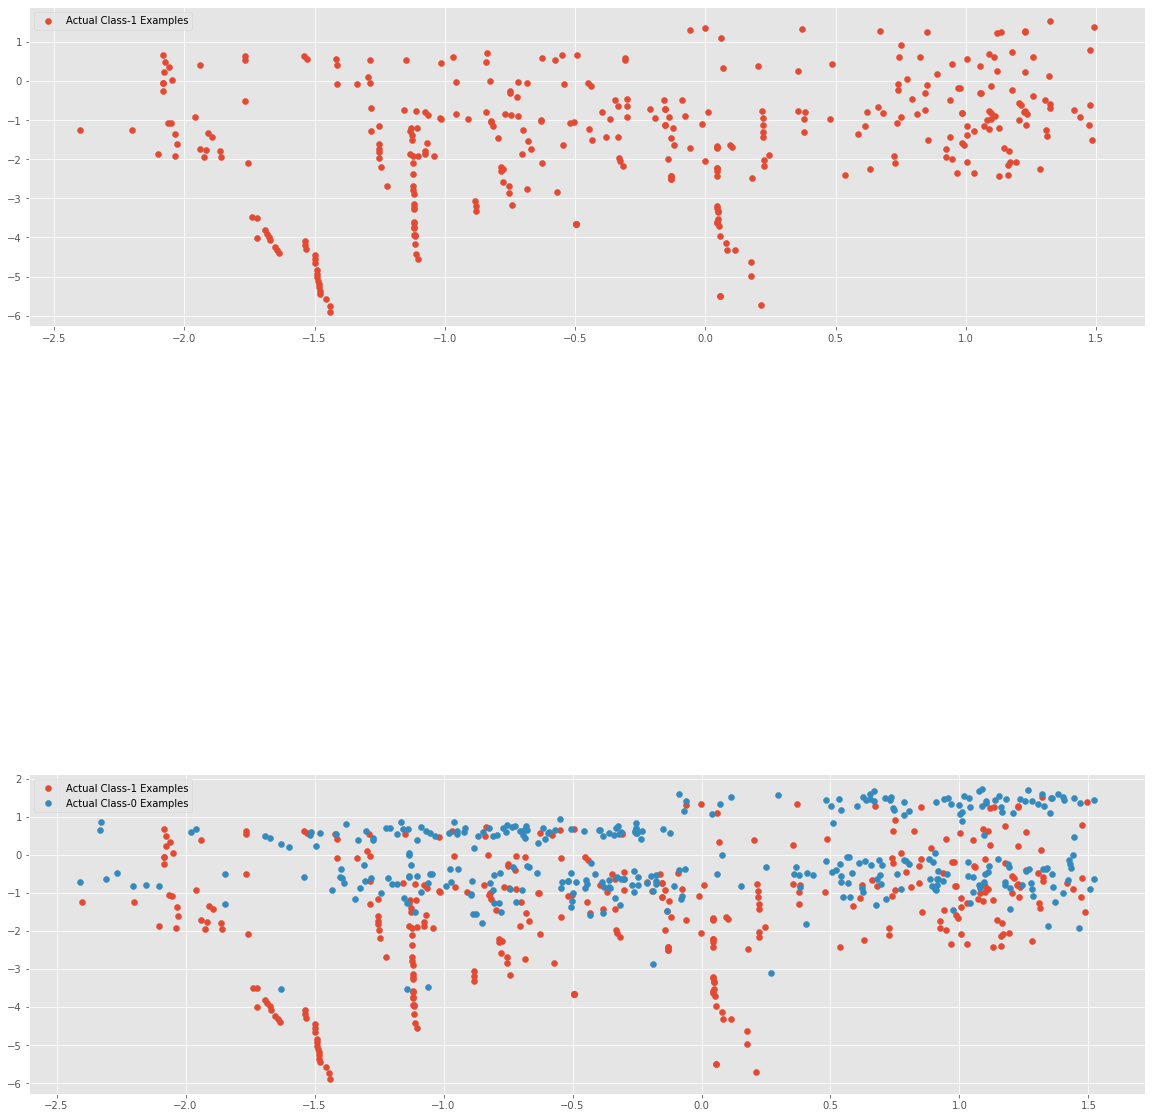

In [100]:
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]
X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

# plt.subplot(3, 1, 2)
# plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
# plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
#             label='Artificial ADASYN Class-1 Examples')
# plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [22]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using ADASYN
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
target = df.loc[:,'Class']
for train_ix, test_ix in skf.split(df, target):
    # select rows
    X_train_cv, X_test_cv = X.iloc[train_ix], X.iloc[test_ix]
    y_train_cv, y_test_cv = target.iloc[train_ix], target.iloc[test_ix]
    # summarize train and test composition
    train_0, train_1 = len(y_train_cv[y_train_cv==0]), len(y_train_cv[y_train_cv==1])
    test_0, test_1 = len(y_test_cv[y_test_cv==0]), len(y_test_cv[y_test_cv==1])
    print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))
    
from imblearn.over_sampling import ADASYN
ad = ADASYN(random_state=0)
X_train_cv_resampled, y_train_cv_resampled = ad.fit_resample(X_train_cv,y_train_cv)

>Train: 0=227452, 1=393, Test: 0=56863, 1=99
>Train: 0=227452, 1=393, Test: 0=56863, 1=99
>Train: 0=227452, 1=394, Test: 0=56863, 1=98
>Train: 0=227452, 1=394, Test: 0=56863, 1=98
>Train: 0=227452, 1=394, Test: 0=56863, 1=98


In [102]:
#perform hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

# Parameter grid
params = [{'penalty' : ['l1', 'l2'],
              'C' : [10, 1.0, 0.1,],
              'solver' : ['liblinear', 'saga']}]

#specify model
logreg = LogisticRegression()

# Create random search object
logreg_cv = RandomizedSearchCV(estimator=logreg, n_iter=20,
                         param_distributions = params, 
                        scoring = 'recall',
                         cv = skf,
                         verbose=1,
                         n_jobs=-1)

# Fit on data
logreg_cv.fit(X_train_cv_resampled, y_train_cv_resampled)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=LogisticRegression(), n_iter=20, n_jobs=-1,
                   param_distributions=[{'C': [10, 1.0, 0.1],
                                         'penalty': ['l1', 'l2'],
                                         'solver': ['liblinear', 'saga']}],
                   scoring='recall', verbose=1)

In [103]:
print(logreg_cv.best_params_)
print(logreg_cv.best_score_)
print(logreg_cv.best_estimator_)

{'solver': 'liblinear', 'penalty': 'l1', 'C': 1.0}
0.9664383199054363
LogisticRegression(penalty='l1', solver='liblinear')


In [104]:
# fit model on training data with tuned hyperparameters
tunedlogreg = LogisticRegression(C=10, penalty='l1', solver='liblinear')
tunedlogreg.fit(X_train_cv_resampled, y_train_cv_resampled)

LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [105]:
#print the evaluation result by choosing a evaluation metric

#Predicting on train set
y_train_pred = tunedlogreg.predict(X_train_cv_resampled)
print("Accuracy : ", round(100*metrics.accuracy_score(y_train_cv_resampled, y_train_pred),2))
print("Recall : ", round(100*metrics.recall_score(y_train_cv_resampled, y_train_pred),2))
print("Precision : ", round(100*metrics.precision_score(y_train_cv_resampled, y_train_pred),2))

Accuracy :  97.78
Recall :  96.6
Precision :  98.94


In [106]:
#Predicting on test set
y_test_pred = tunedlogreg.predict(X_test_cv)
print("Accuracy : ", round(100*metrics.accuracy_score(y_test_cv, y_test_pred),2))
print("Recall : ", round(100*metrics.recall_score(y_test_cv, y_test_pred),2))
print("Precision : ", round(100*metrics.precision_score(y_test_cv, y_test_pred),2))

Accuracy :  99.04
Recall :  85.71
Precision :  13.68


In [107]:
#print the optimum value of hyperparameters
print(logreg_cv.best_params_)

{'solver': 'liblinear', 'penalty': 'l1', 'C': 1.0}


##### Build models on other algorithms to see the better performing on ADASYN

## Random Forest

In [108]:
from sklearn.ensemble import RandomForestClassifier
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
# Parameter grid
params = {'max_depth': [5,10,20],
         'min_samples_leaf': [1,5,10],
          'min_samples_split': [2, 5, 10],
          'max_features': ['auto','sqrt'],
         }

# Specify model
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)

# Create random search object
random = RandomizedSearchCV(estimator=rfc,
                         param_distributions = params,
                         scoring = 'recall',
                         cv = skf,
                         verbose=1,
                        n_jobs=-1, random_state=42)

# Fit on data
random.fit(X_train_cv_resampled, y_train_cv_resampled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 5, 10],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, scoring='recall', verbose=1)

In [109]:
print(random.best_params_)
print(random.best_score_)
print(random.best_estimator_)

{'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 20}
0.9999912060853889
RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=5, n_jobs=-1, random_state=42)


In [110]:
# fit model on training data with tuned hyperparameters
tunedrfc = RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=5, n_jobs=-1, random_state=42)
tunedrfc.fit(X_train_cv_resampled, y_train_cv_resampled)

RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=5, n_jobs=-1, random_state=42)

In [111]:
#Predicting on train set
y_train_pred = tunedrfc.predict(X_train_cv_resampled)
print("Accuracy : ", round(100*metrics.accuracy_score(y_train_cv_resampled, y_train_pred),2))
print("Recall : ", round(100*metrics.recall_score(y_train_cv_resampled, y_train_pred),2))
print("Precision : ", round(100*metrics.precision_score(y_train_cv_resampled, y_train_pred),2))

Accuracy :  99.99
Recall :  100.0
Precision :  99.98


In [112]:
#Predicting on test set
y_test_pred = tunedrfc.predict(X_test_cv)
print("Accuracy : ", round(100*metrics.accuracy_score(y_test_cv, y_test_pred),2))
print("Recall : ", round(100*metrics.recall_score(y_test_cv, y_test_pred),2))
print("Precision : ", round(100*metrics.precision_score(y_test_cv, y_test_pred),2))

Accuracy :  99.93
Recall :  82.65
Precision :  77.14


## XGBOOST

In [23]:
from xgboost import XGBClassifier
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
# Parameter grid
params = {
    'learning_rate': [0.1,0.15],
    'max_depth': [2,5],
    'min_child_weight': [3,5],
    'subsample': [0.5,0.7],
    'gamma' : [0,1]
         }
         
#specify model
xgb = XGBClassifier(random_state=42, n_jobs=-1)
#xgb.fit(X_train_pca, y_train)

# Create random search object
random = RandomizedSearchCV(estimator=xgb,
                         param_distributions = params,
                         scoring = 'recall',
                         cv = skf,
                         verbose=1,n_jobs=-1,
                           random_state=42)

# Fit on data
random.fit(X_train_cv_resampled, y_train_cv_resampled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, m...
                                           n_estimators=100, n_jobs=-1,
                                           num_parallel_tree=None,
                                           random_state=42, reg_alpha=None,
                                           reg_lambd

In [24]:
print(random.best_params_)
print(random.best_score_)
print(random.best_estimator_)

{'subsample': 0.5, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.15, 'gamma': 0}
0.9998549019555416
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [25]:
# fit model on training data with tuned hyperparameters
tunedxgb = XGBClassifier(subsample= 0.5, min_child_weight= 7, max_depth= 2, learning_rate= 0.06,
                    gamma= 100, random_state=42, n_jobs=-1,reg_alpha=500, colsample_bytree=0.5)
tunedxgb.fit(X_train_cv_resampled, y_train_cv_resampled)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=100, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.06, max_delta_step=0, max_depth=2,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=500, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [26]:
#Predicting on train set
y_train_pred = tunedxgb.predict(X_train_cv_resampled)
print("Accuracy : ", round(100*metrics.accuracy_score(y_train_cv_resampled, y_train_pred),2))
print("Recall : ", round(100*metrics.recall_score(y_train_cv_resampled, y_train_pred),2))
print("Precision : ", round(100*metrics.precision_score(y_train_cv_resampled, y_train_pred),2))

Accuracy :  97.09
Recall :  95.57
Precision :  98.56


In [27]:
#Predicting on test set
y_test_pred = tunedxgb.predict(X_test_cv)
print("Accuracy : ", round(100*metrics.accuracy_score(y_test_cv, y_test_pred),2))
print("Recall : ", round(100*metrics.recall_score(y_test_cv, y_test_pred),2))
print("Precision : ", round(100*metrics.precision_score(y_test_cv, y_test_pred),2))

Accuracy :  98.67
Recall :  87.76
Precision :  10.35


## Using scale_pos_weight

In [28]:
# fit model on training data with tuned hyperparameters
xgb = XGBClassifier(subsample= 0.5, min_child_weight= 8, max_depth= 2, learning_rate= 0.06,
                    gamma= 1, random_state=42, n_jobs=-1,reg_alpha=600, colsample_bytree=0.5, scale_pos_weight=577.28934)
xgb.fit(X_train_cv, y_train_cv)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.06, max_delta_step=0, max_depth=2,
              min_child_weight=8, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=600, reg_lambda=1, scale_pos_weight=577.28934,
              subsample=0.5, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [29]:
#Predicting on train set
y_train_pred = xgb.predict(X_train_cv)
print("Accuracy : ", round(100*metrics.accuracy_score(y_train_cv, y_train_pred),2))
print("Recall : ", round(100*metrics.recall_score(y_train_cv, y_train_pred),2))
print("Precision : ", round(100*metrics.precision_score(y_train_cv, y_train_pred),2))

Accuracy :  98.35
Recall :  92.13
Precision :  8.87


In [30]:
#Predicting on test set
y_test_pred = xgb.predict(X_test_cv)
print("Accuracy : ", round(100*metrics.accuracy_score(y_test_cv, y_test_pred),2))
print("Recall : ", round(100*metrics.recall_score(y_test_cv, y_test_pred),2))
print("Precision : ", round(100*metrics.precision_score(y_test_cv, y_test_pred),2))

Accuracy :  98.36
Recall :  88.78
Precision :  8.62


### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [31]:
# perform the best oversampling method on X_train & y_train

# Since scale_pos_weight in xgboost gives better recall than all the oversampling methods, not applying oversampling.

#initialise the model with optimum hyperparameters
clf = XGBClassifier(subsample= 0.5, min_child_weight= 8, max_depth= 2, learning_rate= 0.06,
                    gamma= 1, random_state=42, n_jobs=-1,reg_alpha=600, colsample_bytree=0.5, scale_pos_weight=577.28934)
# fit on the balanced dataset
clf.fit(X_train_cv, y_train_cv) 
y_test_pred = xgb.predict(X_test_cv)

#print the evaluation score on the X_test by choosing the best evaluation metric
print("Recall : ", round(100*metrics.recall_score(y_test_cv, y_test_pred),2))

Recall :  88.78


### Print the important features of the best model to understand the dataset

Top var = 11
2nd Top var = 15
3rd Top var = 18


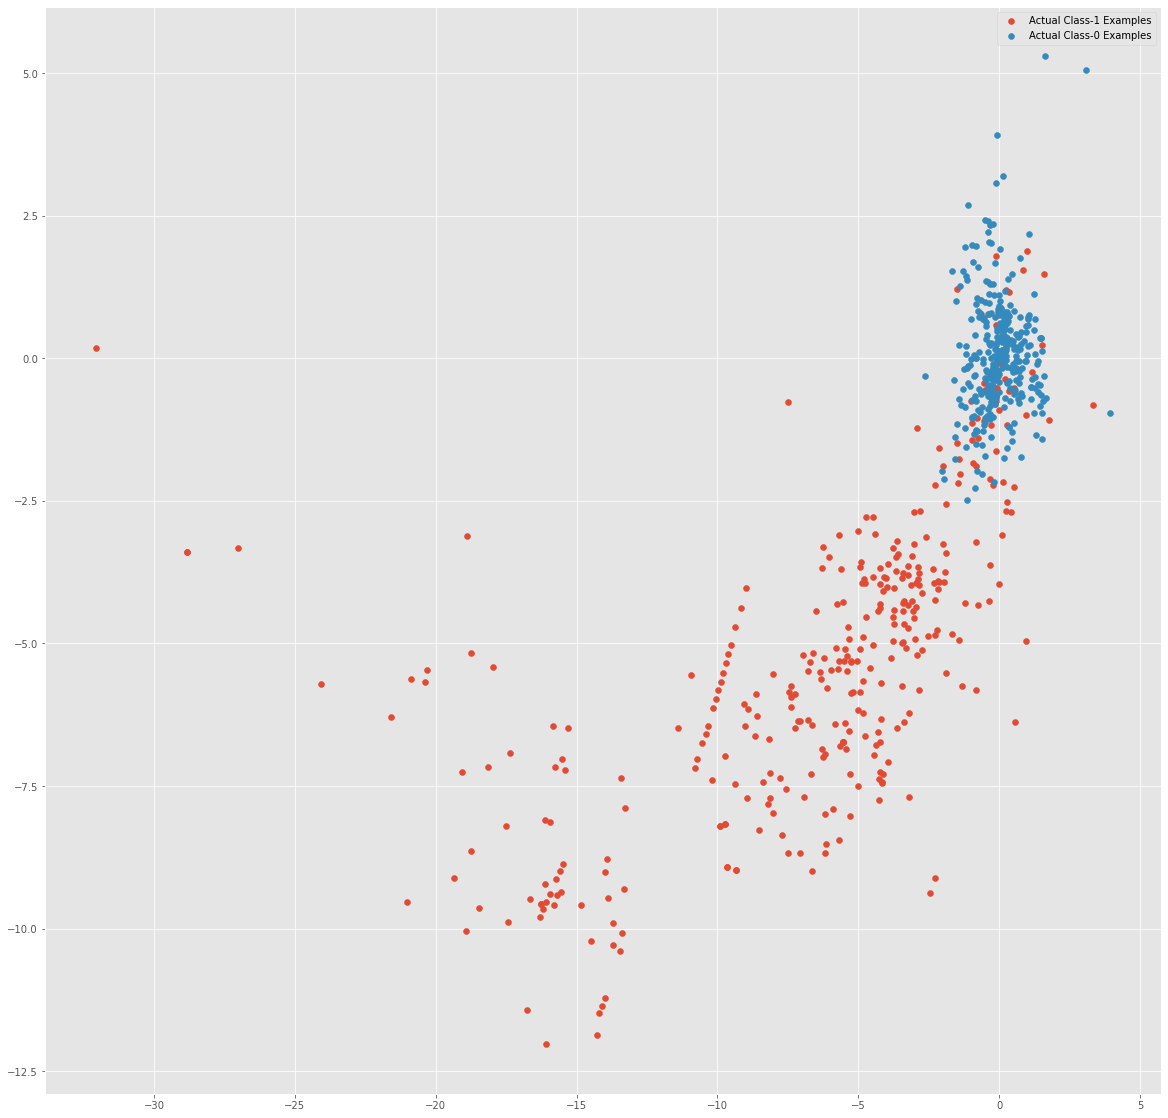

In [32]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [33]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [34]:
print('Train auc =', metrics.roc_auc_score(y, clf.predict_proba(X)[:, 1]))

Train auc = 0.9918077917699494


In [35]:
fpr, tpr, thresholds = metrics.roc_curve(y,clf.predict_proba(X)[:, 1])
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

0.3300423
